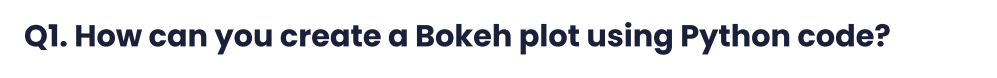

In [2]:
from IPython import display
display.Image("6.png")

Bokeh is a Python library that allows you to create interactive data visualizations in a web browser. Here's how you can create a Bokeh plot using Python code:

Install Bokeh: You can install Bokeh using pip, which is the Python package manager.

In [3]:
!pip install bokeh
import bokeh
bokeh.__version__

'2.4.3'

In [4]:
import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()
from bokeh.plotting import figure, output_file, show

Loading BokehJS ...

In [10]:
x = [4, 5, 7, 8, 9]
y = [6, 7, 8, 9, 10]
output_file('line.html')
p = figure(title = 'line plot')
p.scatter (x, y , fill_color = 'yellow', legend_label = 'yellow points', size = 10)
show(p)

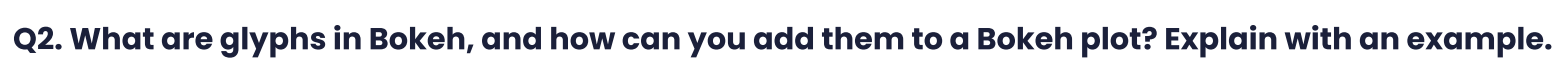

In [3]:
from IPython import display
display.Image("7.png")

Glyphs are the basic building blocks of visualizations in Bokeh. A glyph is a visual shape or marker that represents data points. Bokeh provides a wide range of glyphs, including lines, circles, squares, triangles, and more.

To add glyphs to a Bokeh plot, you can use the glyph methods provided by the figure object. These methods take arrays of data for the x and y coordinates, as well as any additional attributes or properties that you want to set for the glyph.

Here's an example of how to add glyphs to a Bokeh plot:

In [14]:
import bokeh.io
import bokeh.plotting
from bokeh.plotting import figure, output_file, show

# Showing output inside notebook
bokeh.io.output_notebook()

# Prepare the data
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# Create a figure
p = figure(title="My Plot", width=200, height=200, x_axis_label="X", y_axis_label="Y",)

# Add a circle glyph
p.circle(x, y, size=10, color="yellow", alpha=0.5,)

# Add a line glyph
p.line(x, y, line_width=2, color="orange")

show(p)

Loading BokehJS ...

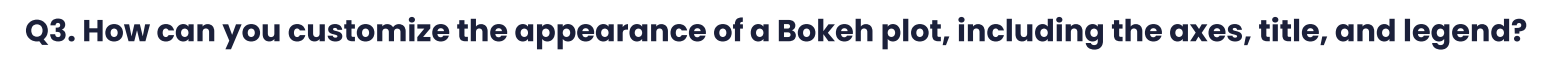

In [4]:
from IPython import display
display.Image("8.png")

In [20]:
import bokeh.io
import bokeh.plotting
from bokeh.plotting import figure , output_file, show
from bokeh.models import Range1d


#showing output inside notebook
bokeh.io.output_notebook()

x = [1,2,3,4,5]
y1 = [5,4,3,2,1]
y2 = [1,1.5, 3, 6, 5]

p = figure (title ='my plot', width = 200, height = 200, background_fill_color = '#f0f0f0')
p.grid.grid_line_color = 'white'


# Set the x-axis label and range
p.xaxis.axis_label = "X"
p.x_range = Range1d(0, 6)

# Set the y-axis label and range
p.yaxis.axis_label = "Y"
p.y_range = Range1d(0, 6)

# Add two line glyphs with legend labels
p.line(x, y1, legend_label="Line 1", line_width=2, color="red")
p.line(x, y2, legend_label="Line 2", line_width=2, color="blue")

# Set the legend location and orientation
p.legend.location = "top_left"
p.legend.orientation = "horizontal"


show(p)#set

Loading BokehJS ...

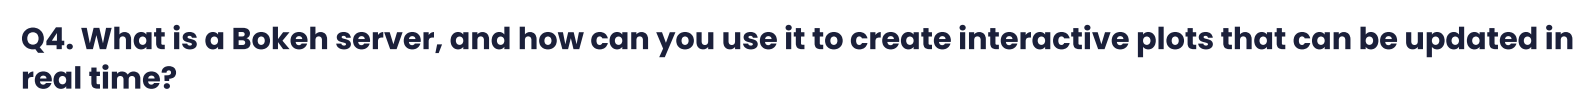

In [5]:
from IPython import display
display.Image("9.png")

A Bokeh server is a Python application that allows you to create interactive web-based visualizations that can be updated in real time. By using the Bokeh server, you can create a plot or dashboard that responds to user input or data changes and updates the visualization automatically, without the need to refresh the page.

To create a Bokeh server application, you need to define a function that returns a Layout object (or a subclass of Layout, such as column or row). The Layout object represents the structure of the web page, and can contain multiple plots and widgets.

Here's an example of a simple Bokeh server application, It displays random scatter plots with different colours automatically.

In [21]:
import random
import bokeh.io
from bokeh.server.server import Server
from bokeh.application import Application
from bokeh.application.handlers.function import FunctionHandler
from bokeh.plotting import figure, ColumnDataSource

# Showing output inside notebook
bokeh.io.output_notebook()

def make_document(doc):
    source = ColumnDataSource({'x': [], 'y': [], 'color': []})

    def update():
        new = {'x': [random.random()],
               'y': [random.random()],
               'color': [random.choice(['red', 'blue', 'green'])]}
        source.stream(new)

    doc.add_periodic_callback(update, 100)

    fig = figure(title='Streaming Circle Plot!', sizing_mode='scale_width',
                 x_range=[0, 1], y_range=[0, 1])
    fig.circle(source=source, x='x', y='y', color='color', size=10)

    doc.title = "Now with live updating!"
    doc.add_root(fig)
    
apps = {'/': Application(FunctionHandler(make_document))}

server = Server(apps, port=5001)
server.start()

print('Please go to following url in Web Browser to run this application : http://localhost:5001/')

Loading BokehJS ...

Please go to following url in Web Browser to run this application : http://localhost:5001/


Stopping the server after application runs. Please note that execute this below command only after executing above code and viewing localhost url

In [22]:
server.stop()

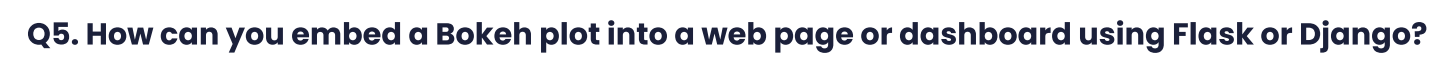

In [6]:
from IPython import display
display.Image("10.png")

In [ ]:
from bokeh.sampledata import download
download()

In [ ]:
### Plotting the candelstick chart for IBM Stock 

In [ ]:
import pandas as pd

from bokeh.plotting import figure, show
from bokeh.sampledata.stocks import IBM
import bokeh.io


# Showing output inside notebook
bokeh.io.output_notebook()

df = pd.DataFrame(IBM)[3000:3060]
df["date"] = pd.to_datetime(df["date"])

inc = df.close > df.open
dec = df.open > df.close
w = 16*60*60*1000 # milliseconds

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, width=1000, height=400,
           title="IBM Candlestick Plot", background_fill_color="#efefef")
p.xaxis.major_label_orientation = 0.8 # radians

p.segment(df.date, df.high, df.date, df.low, color="black")

p.vbar(df.date[dec], w, df.open[dec], df.close[dec], color="#eb3c40")
p.vbar(df.date[inc], w, df.open[inc], df.close[inc], fill_color="green",
       line_color="green", line_width=2)

show(p)

In [ ]:
#Getting Script and div of above plot


from bokeh.embed import components
script, div = components(p)

from bokeh.resources import CDN
cdn_js = CDN.js_files


cdn_js[0]

In [ ]:
#Creating Flask app


import pandas as pd
from bokeh.plotting import figure, show
from bokeh.sampledata.stocks import IBM
from flask import Flask, render_template
from bokeh.embed import components
from bokeh.resources import CDN

app = Flask(__name__)

@app.route('/')
def plot_bokeh():
    df = pd.DataFrame(IBM)[3000:3060]
    df["date"] = pd.to_datetime(df["date"])

    inc = df.close > df.open
    dec = df.open > df.close
    w = 16*60*60*1000 # milliseconds

    TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

    p = figure(x_axis_type="datetime", tools=TOOLS, width=1000, height=400,
               title="IBM Candlestick Plot", background_fill_color="#efefef")
    p.xaxis.major_label_orientation = 0.8 # radians

    p.segment(df.date, df.high, df.date, df.low, color="black")

    p.vbar(df.date[dec], w, df.open[dec], df.close[dec], color="#eb3c40")
    p.vbar(df.date[inc], w, df.open[inc], df.close[inc], fill_color="green",
           line_color="green", line_width=2)
    
    script, div = components(p)
    cdn_js = CDN.js_files[0]

    return render_template('index.html',cdn_js=cdn_js,script=script,div=div)

if __name__ == "__main__":
    app.run()